In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\purvade\Documents\purva\6th sem\csv files\salesdaily.csv")

In [3]:
df

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.00,3.670,3.40,32.40,7.0,0.0,0.0,2.00,2014,1,248,Thursday
1,1/3/2014,8.00,4.000,4.40,50.60,16.0,0.0,20.0,4.00,2014,1,276,Friday
2,1/4/2014,2.00,1.000,6.50,61.85,10.0,0.0,9.0,1.00,2014,1,276,Saturday
3,1/5/2014,4.00,3.000,7.00,41.10,8.0,0.0,3.0,0.00,2014,1,276,Sunday
4,1/6/2014,5.00,1.000,4.50,21.70,16.0,2.0,6.0,2.00,2014,1,276,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,10/4/2019,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2102,10/5/2019,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2103,10/6/2019,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2104,10/7/2019,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday


In [4]:
df['datum'] = pd.to_datetime(df['datum'])

In [5]:
df.set_index('datum', inplace=True)

In [6]:
df.head(5)

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 213.9+ KB


In [8]:
df.isnull().sum()

M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
dtype: int64

In [9]:
df_long = df[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].copy()
df_long['datum'] = df.index
df_melted = df_long.melt(id_vars='datum', var_name='ATC_Code', value_name='Quantity_Sold')

In [10]:
df_melted

,datum,ATC_Code,Quantity_Sold
0,2014-01-02,M01AB,0.00
1,2014-01-03,M01AB,8.00
2,2014-01-04,M01AB,2.00
3,2014-01-05,M01AB,4.00
4,2014-01-06,M01AB,5.00
...,...,...,...
16843,2019-10-04,R06,1.00
16844,2019-10-05,R06,0.33
16845,2019-10-06,R06,4.20
16846,2019-10-07,R06,1.00


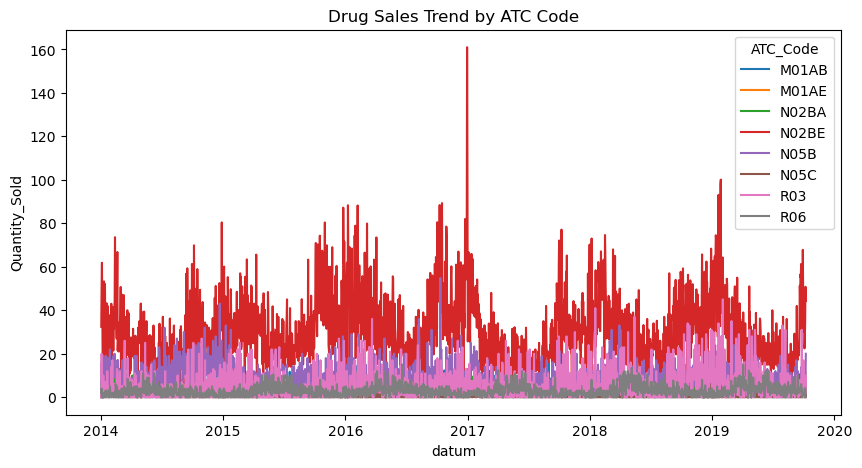

In [11]:
atc_trend = df_melted.groupby(['datum', 'ATC_Code'])['Quantity_Sold'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=atc_trend, x='datum', y='Quantity_Sold', hue='ATC_Code')
plt.title("Drug Sales Trend by ATC Code")
plt.show()

In [12]:
monthly_sales = df[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].resample('ME').sum()


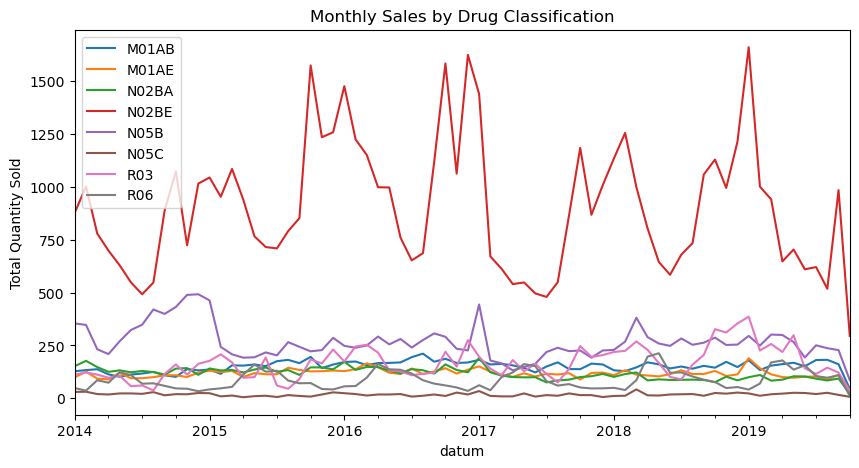

In [13]:
monthly_sales.plot(figsize=(10,5), title="Monthly Sales by Drug Classification")
plt.ylabel("Total Quantity Sold")
plt.show()

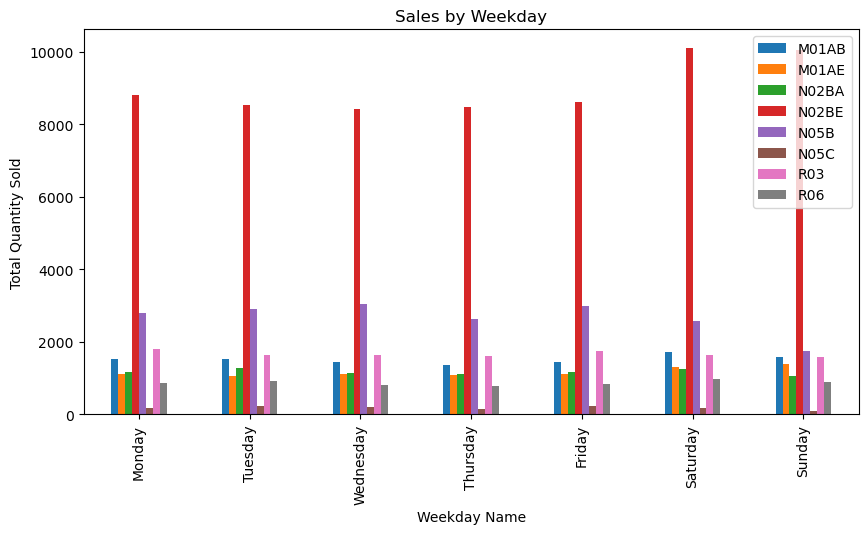

In [14]:
weekday_sales = df.groupby('Weekday Name')[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)
weekday_sales.plot(kind='bar', figsize=(10,5), title="Sales by Weekday")
plt.ylabel("Total Quantity Sold")
plt.show()

In [34]:
atc_totals = df[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].sum().sort_values(ascending=False)


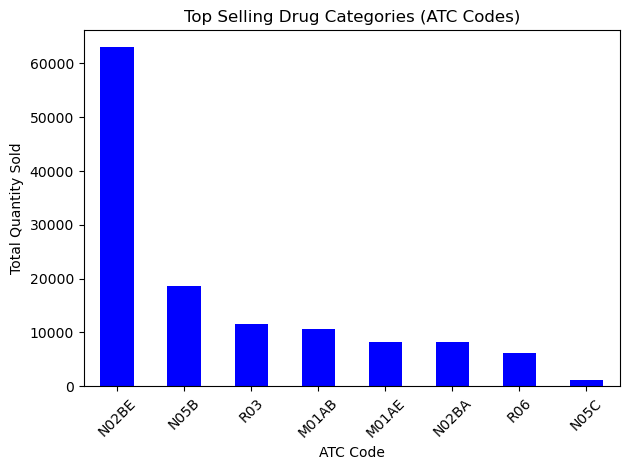

In [38]:
top_atc = atc_totals.head(10)
top_atc.plot(kind='bar', title='Top Selling Drug Categories (ATC Codes)', color='blue')
plt.ylabel("Total Quantity Sold")
plt.xlabel("ATC Code")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
df.to_csv("cleaned_pharma_data.csv", index=False)